In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt

variablesKey = 'Validators'
variablesSplit = 'l2_relative_error_'
validatorsRename = {'validator':'r1.0','validator_2':'r0.85','validator_3':'r0.75'}
variablesID = 'validator'
#TODO get subfolders automatically
subfolders = ['102-NV-Importance','105-NV-Importance','NV-Importance','11-NV-Importance'] ##UPDATE

# run aggregates with these subfoldetrs
#folder = 'C:/Users/jacec/Documents/Test_Runs/'
folder = 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/'
#aggregates = [folder+f+'/aggregates/' for f in os.listdir(folder) if os.path.isdir(folder+f)][0:1]
aggregates = [folder+f+'/aggregates/' for f in ['nv_102-105'] if os.path.isdir(folder+f)] ##UPDATE
#all results will be in /aggregates, separated by tags from subfolders
#find all validation files separated by subfolder
files = []
#for i in aggregates:
#    csvs_by_testcase = [[i + g for g in os.listdir(i) if (g.endswith('.csv')) and (variablesKey in g) and (f in g)] for f in subfolders]
#    files = files+[i for i in csvs_by_testcase if i]
files = [[i+g for g in os.listdir(i) if g.endswith('.csv') and (variablesKey in g)] for i in aggregates]
#files = [[aggregates + g for g in os.listdir(aggregates) if ('.csv' in g) and (f in g)] for f in subfolders] 
#list of lists of the files for each individual aggregation
#Go through sub-list, load into dataframes with descriptive columns
#Find unique variables, create sub-frames with them in a format for plotting



In [14]:
files

[['C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/Validatorsvalidatorl2_relative_error_p-102-NV-Importance-nv_102-105.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/Validatorsvalidatorl2_relative_error_p-105-NV-Importance-nv_102-105.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/Validatorsvalidatorl2_relative_error_p-11-NV-Importance-nv_102-105.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/Validatorsvalidatorl2_relative_error_p-NV-Importance-nv_102-105.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/Validatorsvalidatorl2_relative_error_u-102-NV-Importance-nv_102-105.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/Validatorsvalidatorl2_relative_error_u-105-NV-Importance-nv_102-105.csv',
  'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/V

In [15]:
#each aggregate becomes one dataframe
#extract common variable names (validator, validator_n, uvpvnu)
#load into df with descriptive columns, uses 'subfolder' name, validator name, variable name
dataframes = []
agNames = []
for aggregation in files:
    dfs = []
    agName = aggregation[0].split('/aggregates/')[0].split('/')[-1]
    for testName in subfolders:
        subtests = [csv for csv in aggregation if testName in csv]
        if not subtests:
            continue
        print(subtests)
        for k,i in enumerate(subtests):
            validatorName = i.split(variablesKey)[1].split(variablesSplit)[0]
            vv = i.split(variablesSplit)[1].split('-'+testName)[0]
            variableName = f'{testName}_{validatorsRename[validatorName]}_{vv}_'
            print(variableName)
            #df = pd.read_csv(i, index_col = 0, delimiter=';')
            df = pd.read_csv(i, delimiter=';')
            oldcols = df.keys()
            print(oldcols)
            #mapping = {i:variableName+i for i in oldcols[0:-1]}
            mapping = {'Unnamed: 0':variableName+'step'}
            if k == 0:
                mapping.update({'wall_time':testName+'_wall_time'})
            mapping.update({i:variableName+i for i in oldcols[1:-1]})
            print(mapping)
            df.rename(columns=mapping, inplace=True)
            newcols = df.keys()
            print(newcols)
            if k > 0:
                df.drop(columns='wall_time')
            dfs.append(df)
    df = pd.concat(dfs, axis=1)
    df = df.loc[:,~df.columns.duplicated()].copy() #drop duplicates based on column name alone
    #append to dataframes list
    dataframes.append(df)
    agNames.append(agName)

['C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/Validatorsvalidatorl2_relative_error_p-102-NV-Importance-nv_102-105.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/Validatorsvalidatorl2_relative_error_u-102-NV-Importance-nv_102-105.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/Validatorsvalidatorl2_relative_error_v-102-NV-Importance-nv_102-105.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/Validatorsvalidator_2l2_relative_error_p-102-NV-Importance-nv_102-105.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/Validatorsvalidator_2l2_relative_error_u-102-NV-Importance-nv_102-105.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/Validatorsvalidator_2l2_relative_error_v-102-NV-Importance-nv_102-105.csv', 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/nv_102-105/aggregates/Val

In [16]:
dataframes[0]
agNames

['nv_102-105']

[['102-NV-Importance_r1.0_p_step', '102-NV-Importance_r1.0_p_mean', '105-NV-Importance_r1.0_p_mean', 'NV-Importance_r1.0_p_mean', '11-NV-Importance_r1.0_p_mean'], ['102-NV-Importance_r0.85_p_step', '102-NV-Importance_r0.85_p_mean', '105-NV-Importance_r0.85_p_mean', 'NV-Importance_r0.85_p_mean', '11-NV-Importance_r0.85_p_mean'], ['102-NV-Importance_r0.75_p_step', '102-NV-Importance_r0.75_p_mean', '105-NV-Importance_r0.75_p_mean', 'NV-Importance_r0.75_p_mean', '11-NV-Importance_r0.75_p_mean']]
[('102-NV-Importance_r1.0_p_step', 350000), ('102-NV-Importance_r1.0_p_mean', 0.1135819107294082), ('105-NV-Importance_r1.0_p_mean', 0.1042315028607845), ('NV-Importance_r1.0_p_mean', 0.1230116952210664), ('11-NV-Importance_r1.0_p_mean', 0.1034729573875665)]
[('102-NV-Importance_r0.85_p_step', 350000), ('102-NV-Importance_r0.85_p_mean', 0.1314101368188858), ('105-NV-Importance_r0.85_p_mean', 0.1343523859977722), ('NV-Importance_r0.85_p_mean', 0.1313688680529594), ('11-NV-Importance_r0.85_p_mean', 0

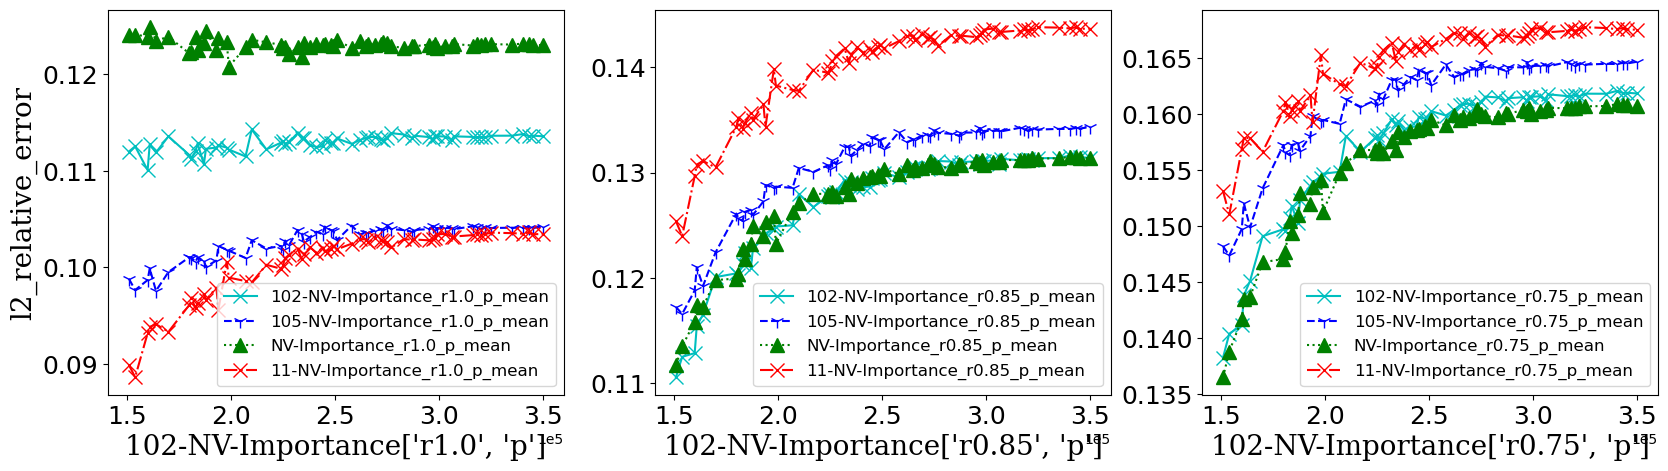

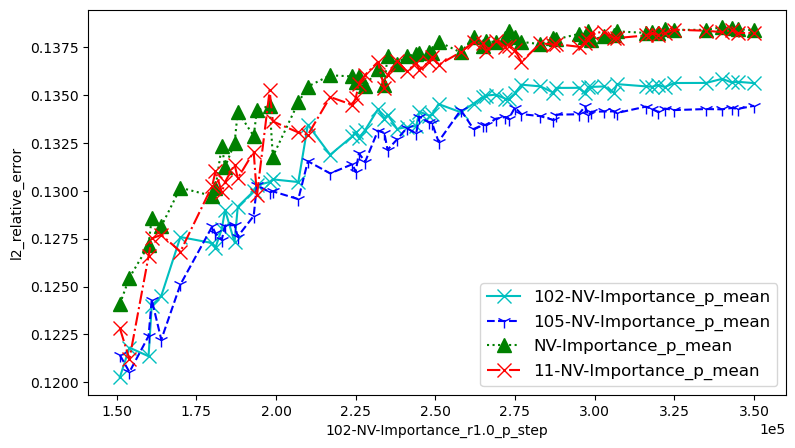

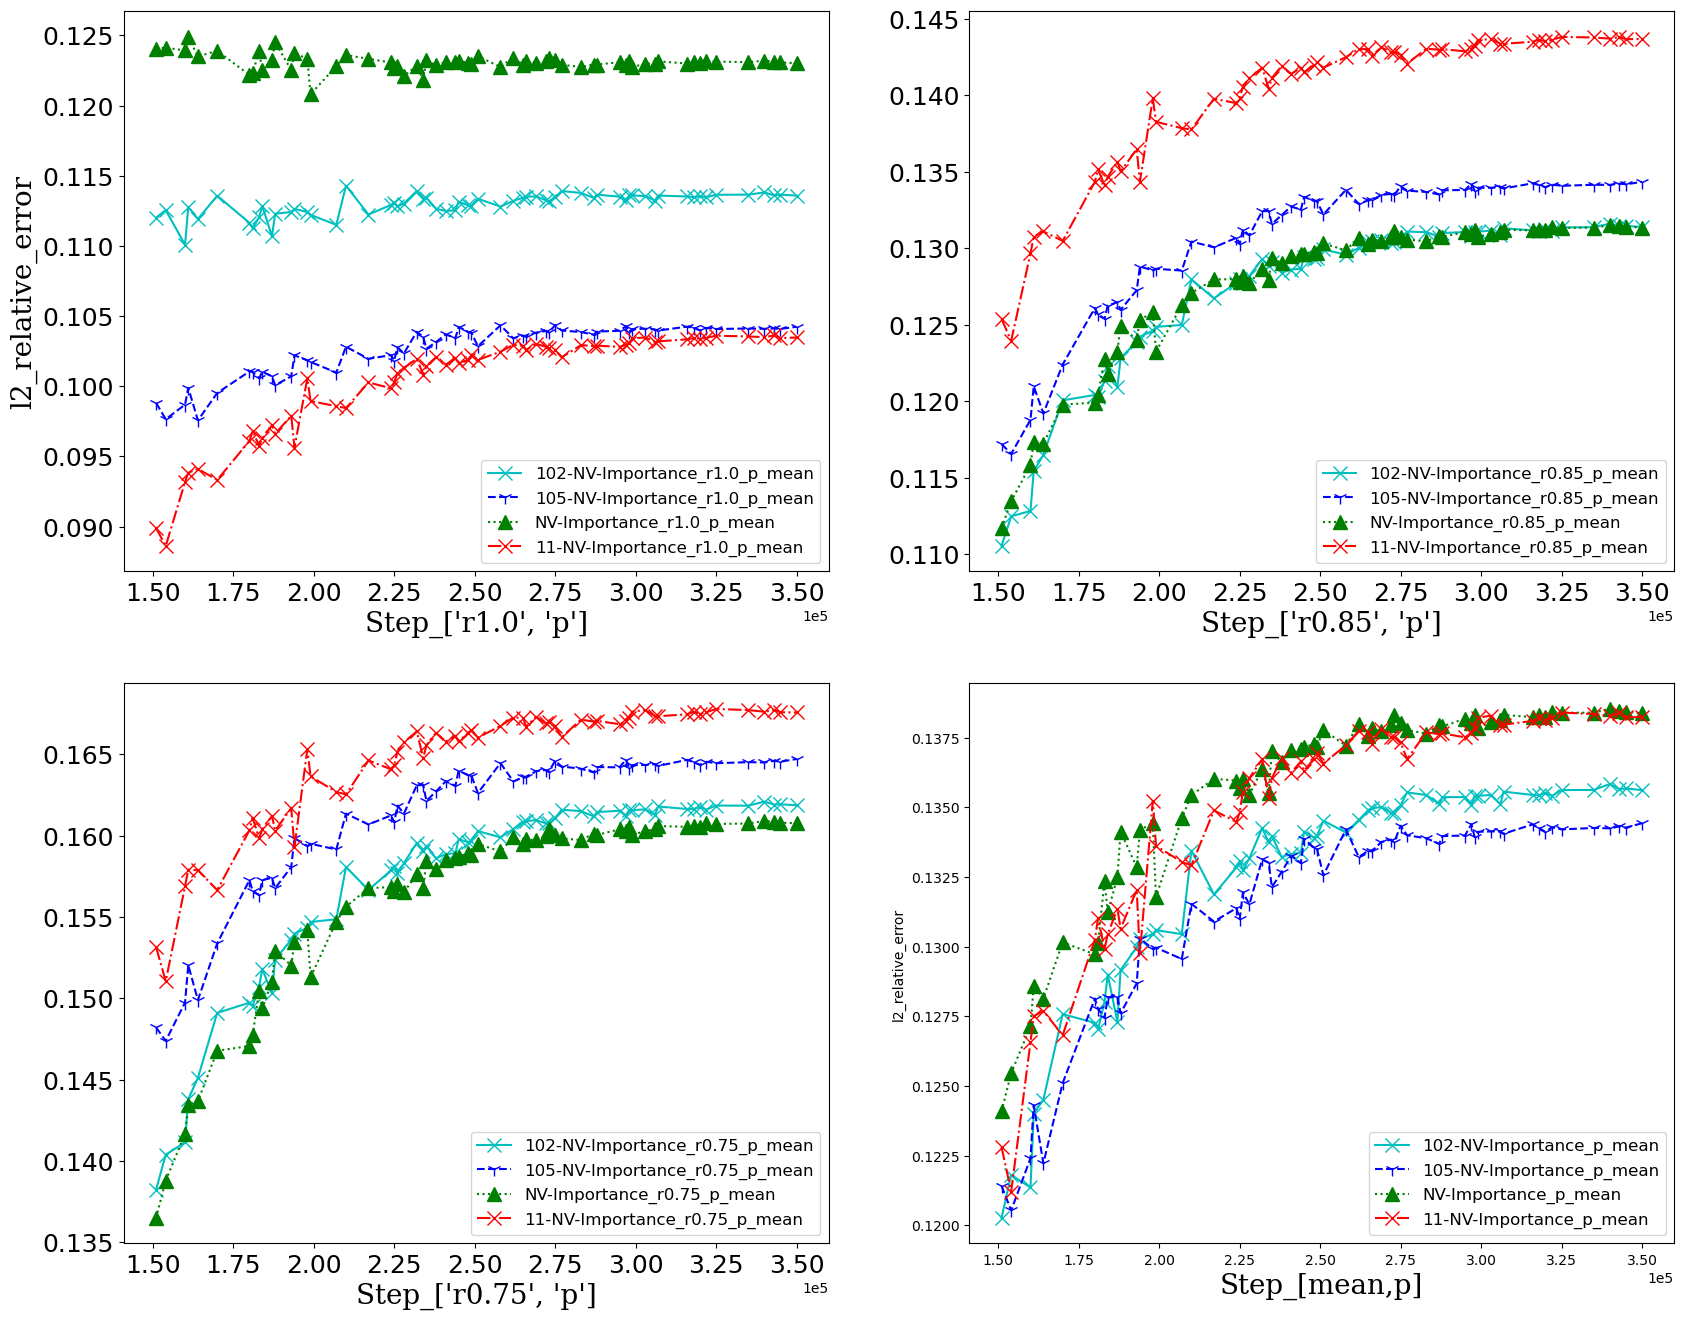

In [17]:
#plot step series p
plotVars_p_allValidators = [[f'{subfolders[0]}_{j}_p_step'] + [f'{i}_{j}_p_mean' for i in subfolders ] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0][f'{subfolders[0]}_r1.0_p_step'] >= 150000
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['r', 'b', 'g', 'c'])+
                      plt.cycler('linestyle', ['-','--',':','-.'])+
                      plt.cycler('marker', ['.','*','^','x']))
    
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['c', 'b', 'g', 'r'])+
                      plt.cycler('linestyle', ['-','--',':','-.'])+
                      plt.cycler('marker', ['x','1','^','x']))
    
font2 = {'family':'serif','color':'black','size':20}
manualLegend = ['Baseline_8M','SGM_SPADE_8M_r1.0_p','MIS_8M_r1.0_p','Baseline_16M_r1.0_p'] ##UPDATE
manualLegend_agg = ['Baseline_8M','SGM_SPADE_8M_mean','MIS_8M_mean','Baseline_16M_mean'] ##UPDATE

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
    #fig.suptitle(f'P step series for {agNames[i]}')
    plt.rc('legend', fontsize = 12)
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        axes[k].tick_params(axis='both', labelsize=18)
        print(f'{[(l,dataframes[i][j][l][99]) for l in dataframes[i][j]]}')
        dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k], markersize=10)
        axes[k].set_xlabel(j[0].split('_')[0]+str(j[0].split('_')[-3:-1]), fontdict=font2)
        #axes[k].legend(manualLegend)

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (9,5))
    #fig.suptitle(f'P step series for {agNames[i]}')
    axes.set_ylabel('l2_relative_error')
    for k in range(1,len(plotVars_p_allValidators[0])):
        set_cycler(axes)
        axes.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        dataframes[i][f'{subfolders[k-1]}_p_mean'] = dataframes[i][[plotVars_p_allValidators[q][k] for q in range(len(plotVars_p_allValidators))]].mean(axis=1)
    dataframes[i][[plotVars_p_allValidators[0][0]]+[f'{subfolders[k-1]}_p_mean' for k in range(1,len(plotVars_p_allValidators[0]))]][stepFilter].plot(x=plotVars_p_allValidators[0][0],ax=axes, markersize=10)
    #axes.legend(manualLegend)

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,16))
    #fig.suptitle(f'P step series for {agNames[i]}')
    plt.rc('legend', fontsize = 12)
    axes = axes.flatten()
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        axes[k].tick_params(axis='both', labelsize=18)
        print(f'{[(l,dataframes[i][j][l][99]) for l in dataframes[i][j]]}')
        dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k],markersize=10)
        axes[k].set_xlabel('Step_'+str(j[0].split('_')[-3:-1]), fontdict=font2)
        #axes[k].legend(manualLegend)


    axes[3].set_ylabel('l2_relative_error')
    for k in range(1,len(plotVars_p_allValidators[0])):
        set_cycler(axes[3])
        axes[3].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        dataframes[i][f'{subfolders[k-1]}_p_mean'] = dataframes[i][[plotVars_p_allValidators[q][k] for q in range(len(plotVars_p_allValidators))]].mean(axis=1)
    dataframes[i][[plotVars_p_allValidators[0][0]]+[f'{subfolders[k-1]}_p_mean' for k in range(1,len(plotVars_p_allValidators[0]))]][stepFilter].plot(x=plotVars_p_allValidators[0][0],ax=axes[3], markersize=10)
    axes[3].set_xlabel('Step_[mean,p]', fontdict=font2)
    #axes[3].legend(manualLegend_agg)

[['102-NV-Importance_r1.0_u_step', '102-NV-Importance_r1.0_u_mean', '105-NV-Importance_r1.0_u_mean', 'NV-Importance_r1.0_u_mean', '11-NV-Importance_r1.0_u_mean'], ['102-NV-Importance_r0.85_u_step', '102-NV-Importance_r0.85_u_mean', '105-NV-Importance_r0.85_u_mean', 'NV-Importance_r0.85_u_mean', '11-NV-Importance_r0.85_u_mean'], ['102-NV-Importance_r0.75_u_step', '102-NV-Importance_r0.75_u_mean', '105-NV-Importance_r0.75_u_mean', 'NV-Importance_r0.75_u_mean', '11-NV-Importance_r0.75_u_mean']]
[('102-NV-Importance_r1.0_u_step', 350000), ('102-NV-Importance_r1.0_u_mean', 0.0340874902904033), ('105-NV-Importance_r1.0_u_mean', 0.0310745369642972), ('NV-Importance_r1.0_u_mean', 0.0374217135831713), ('11-NV-Importance_r1.0_u_mean', 0.029869167599827)]
[('102-NV-Importance_r0.85_u_step', 350000), ('102-NV-Importance_r0.85_u_mean', 0.0274306386709213), ('105-NV-Importance_r0.85_u_mean', 0.0289695374667644), ('NV-Importance_r0.85_u_mean', 0.0263448851183056), ('11-NV-Importance_r0.85_u_mean', 0.

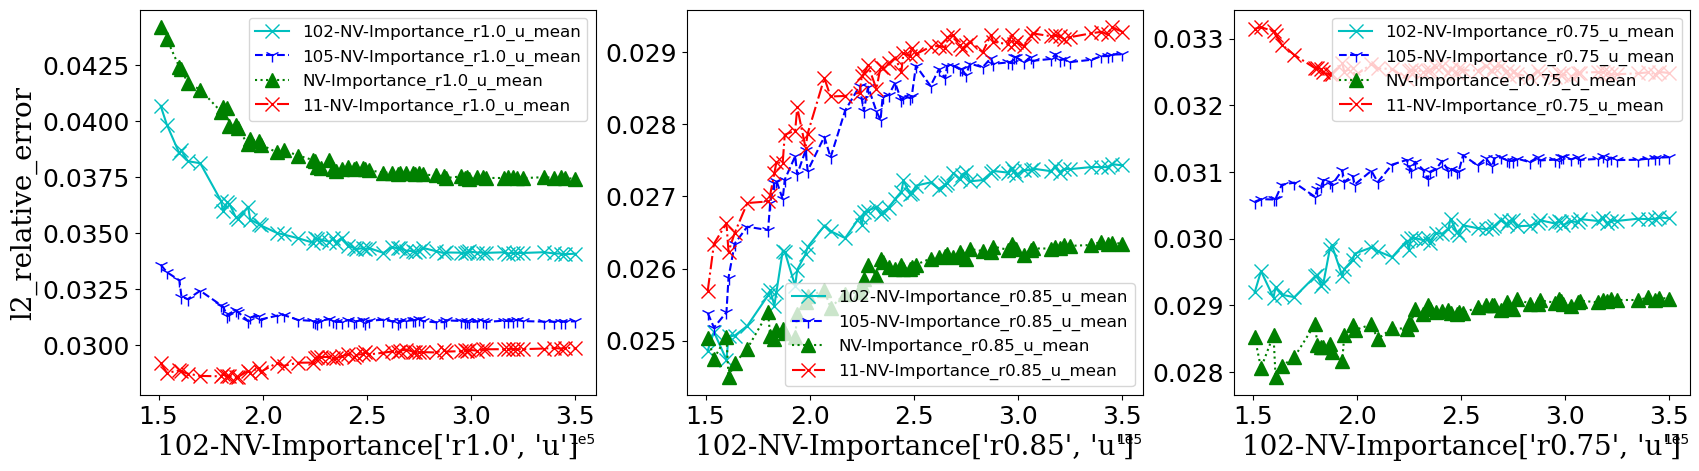

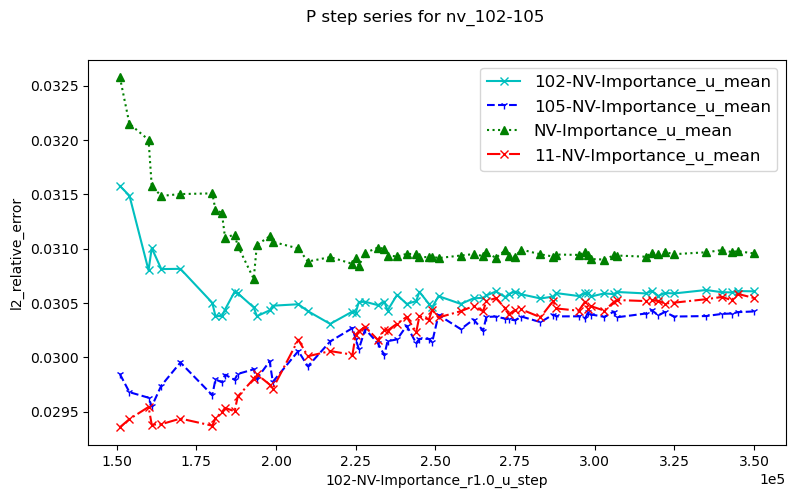

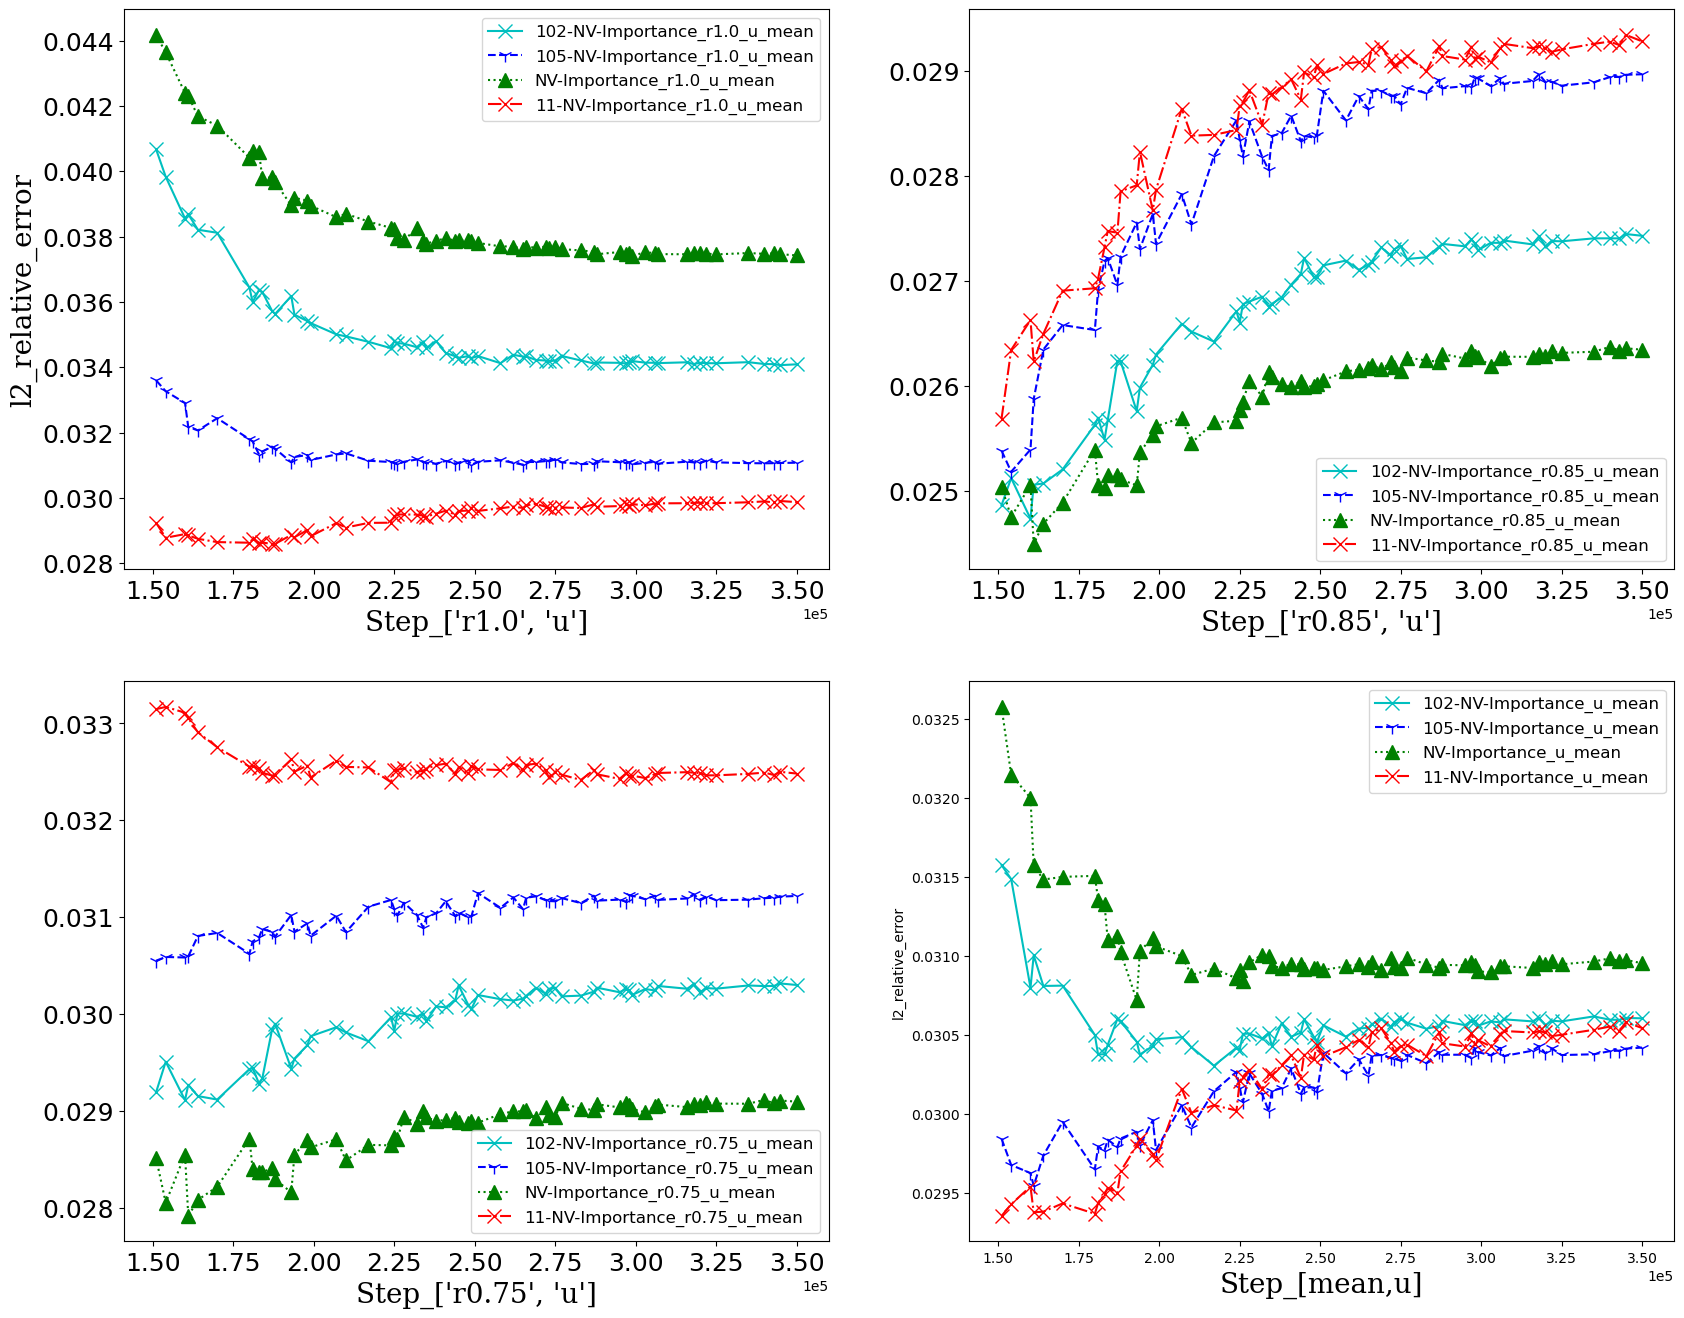

In [18]:
#plot step series u
plotVars_p_allValidators = [[f'{subfolders[0]}_{j}_u_step'] + [f'{i}_{j}_u_mean' for i in subfolders ] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0][f'{subfolders[0]}_r1.0_u_step'] >= 150000
#fmt = '[marker][line][color]' linestyle='--', marker='o', color='b'
#fmts = ['-r','--*b',':^g','-.xc']
#formats = {'marker':['.','*','^','x'], 'linestyle':['-','--',':','-.'], 'color':['r','b','g','c']}

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
    #fig.suptitle(f'P step series for {agNames[i]}')
    plt.rc('legend', fontsize = 12)
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        axes[k].tick_params(axis='both', labelsize=18)
        print(f'{[(l,dataframes[i][j][l][99]) for l in dataframes[i][j]]}')
        dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k],markersize=10)
        axes[k].set_xlabel(j[0].split('_')[0]+str(j[0].split('_')[-3:-1]), fontdict=font2)
        #axes[k].legend(manualLegend)

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (9,5))
    fig.suptitle(f'P step series for {agNames[i]}')
    axes.set_ylabel('l2_relative_error')
    for k in range(1,len(plotVars_p_allValidators[0])):
        set_cycler(axes)
        axes.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        dataframes[i][f'{subfolders[k-1]}_u_mean'] = dataframes[i][[plotVars_p_allValidators[q][k] for q in range(len(plotVars_p_allValidators))]].mean(axis=1)
    dataframes[i][[plotVars_p_allValidators[0][0]]+[f'{subfolders[k-1]}_u_mean' for k in range(1,len(plotVars_p_allValidators[0]))]][stepFilter].plot(x=plotVars_p_allValidators[0][0],ax=axes)
    #axes.legend(manualLegend)


for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,16))
    #fig.suptitle(f'P step series for {agNames[i]}')
    plt.rc('legend', fontsize = 12)
    axes = axes.flatten()
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        axes[k].tick_params(axis='both', labelsize=18)
        print(f'{[(l,dataframes[i][j][l][99]) for l in dataframes[i][j]]}')
        dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k],markersize=10)
        axes[k].set_xlabel('Step_'+str(j[0].split('_')[-3:-1]), fontdict=font2)
        #axes[k].legend(manualLegend)


    axes[3].set_ylabel('l2_relative_error')
    for k in range(1,len(plotVars_p_allValidators[0])):
        set_cycler(axes[3])
        axes[3].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        dataframes[i][f'{subfolders[k-1]}_u_mean'] = dataframes[i][[plotVars_p_allValidators[q][k] for q in range(len(plotVars_p_allValidators))]].mean(axis=1)
    dataframes[i][[plotVars_p_allValidators[0][0]]+[f'{subfolders[k-1]}_u_mean' for k in range(1,len(plotVars_p_allValidators[0]))]][stepFilter].plot(x=plotVars_p_allValidators[0][0],ax=axes[3], markersize=10)
    axes[3].set_xlabel('Step_[mean,u]', fontdict=font2)
    #axes[3].legend(manualLegend_agg)

[['102-NV-Importance_r1.0_v_step', '102-NV-Importance_r1.0_v_mean', '105-NV-Importance_r1.0_v_mean', 'NV-Importance_r1.0_v_mean', '11-NV-Importance_r1.0_v_mean'], ['102-NV-Importance_r0.85_v_step', '102-NV-Importance_r0.85_v_mean', '105-NV-Importance_r0.85_v_mean', 'NV-Importance_r0.85_v_mean', '11-NV-Importance_r0.85_v_mean'], ['102-NV-Importance_r0.75_v_step', '102-NV-Importance_r0.75_v_mean', '105-NV-Importance_r0.75_v_mean', 'NV-Importance_r0.75_v_mean', '11-NV-Importance_r0.75_v_mean']]
[('102-NV-Importance_r1.0_v_step', 350000), ('102-NV-Importance_r1.0_v_mean', 0.0281845424324274), ('105-NV-Importance_r1.0_v_mean', 0.0266391783952713), ('NV-Importance_r1.0_v_mean', 0.0297142802737653), ('11-NV-Importance_r1.0_v_mean', 0.0260476833209395)]
[('102-NV-Importance_r0.85_v_step', 350000), ('102-NV-Importance_r0.85_v_mean', 0.0241725840605795), ('105-NV-Importance_r0.85_v_mean', 0.0244570947252213), ('NV-Importance_r0.85_v_mean', 0.0239833598025143), ('11-NV-Importance_r0.85_v_mean', 0

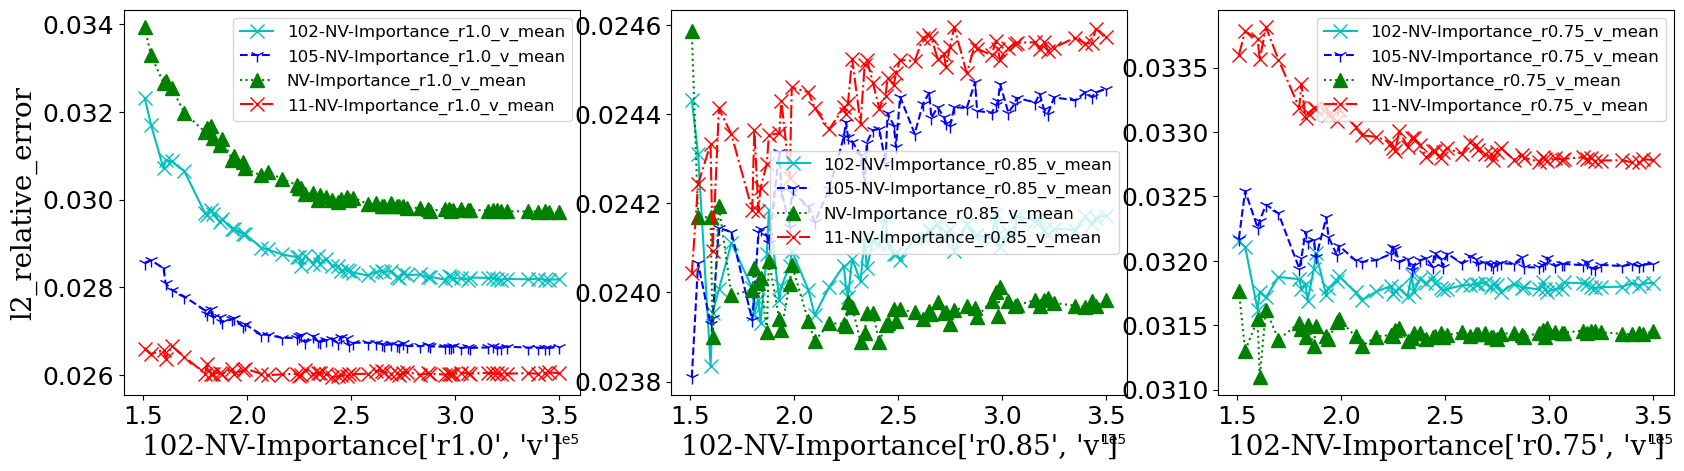

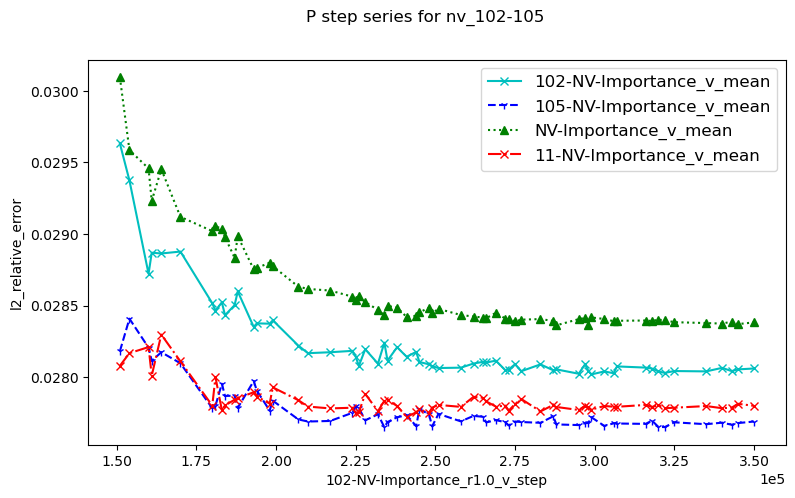

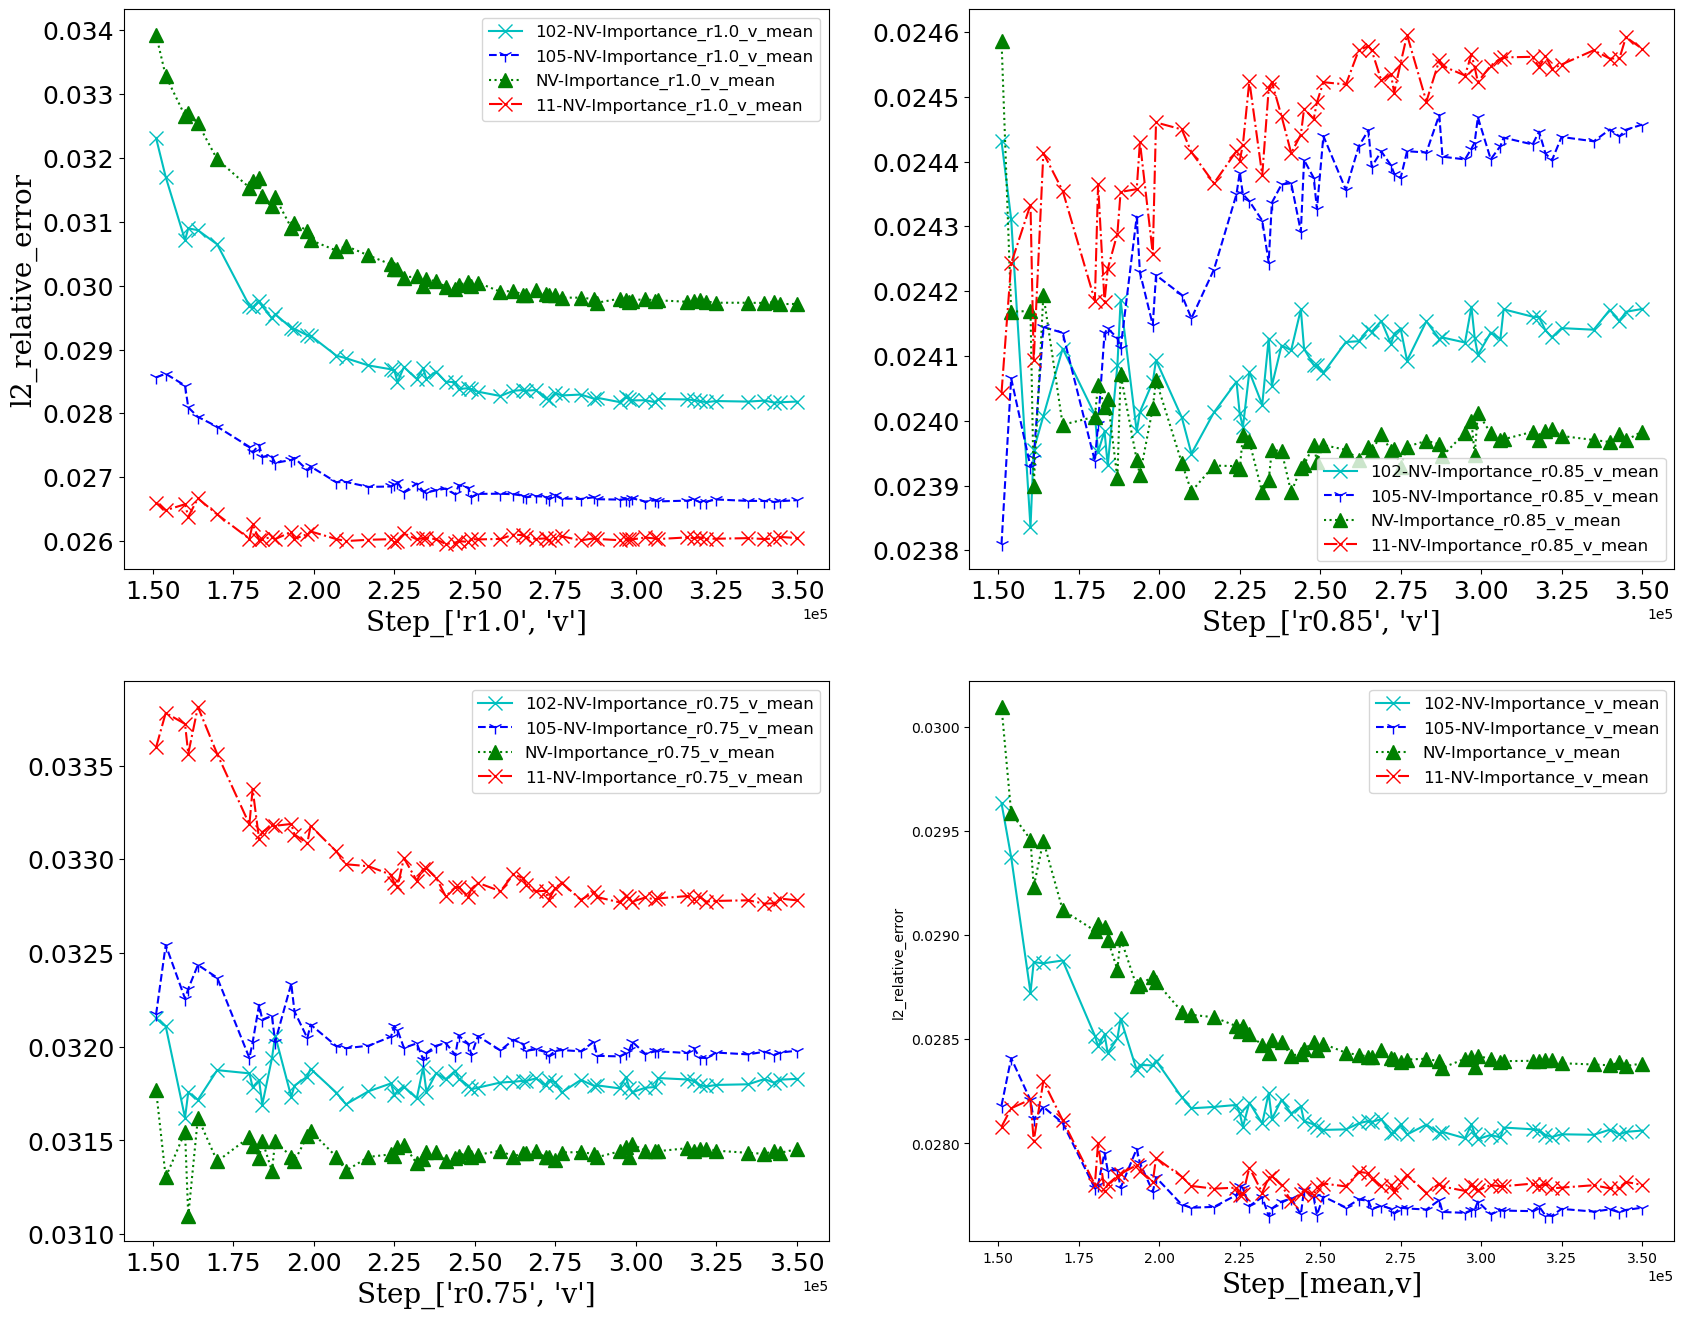

In [19]:
#plot step series v 
plotVars_p_allValidators = [[f'{subfolders[0]}_{j}_v_step'] + [f'{i}_{j}_v_mean' for i in subfolders ] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0][f'{subfolders[0]}_r1.0_v_step'] >= 150000
#fmt = '[marker][line][color]' linestyle='--', marker='o', color='b'
#fmts = ['-r','--*b',':^g','-.xc']
#formats = {'marker':['.','*','^','x'], 'linestyle':['-','--',':','-.'], 'color':['r','b','g','c']}

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
    #fig.suptitle(f'P step series for {agNames[i]}')
    plt.rc('legend', fontsize = 12)
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        axes[k].tick_params(axis='both', labelsize=18)
        print(f'{[(l,dataframes[i][j][l][99]) for l in dataframes[i][j]]}')
        dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k],markersize=10)
        axes[k].set_xlabel(j[0].split('_')[0]+str(j[0].split('_')[-3:-1]), fontdict=font2)
        #axes[k].legend(manualLegend)

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (9,5))
    fig.suptitle(f'P step series for {agNames[i]}')
    axes.set_ylabel('l2_relative_error')
    for k in range(1,len(plotVars_p_allValidators[0])):
        set_cycler(axes)
        axes.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        dataframes[i][f'{subfolders[k-1]}_v_mean'] = dataframes[i][[plotVars_p_allValidators[q][k] for q in range(len(plotVars_p_allValidators))]].mean(axis=1)
    dataframes[i][[plotVars_p_allValidators[0][0]]+[f'{subfolders[k-1]}_v_mean' for k in range(1,len(plotVars_p_allValidators[0]))]][stepFilter].plot(x=plotVars_p_allValidators[0][0],ax=axes)
    #axes.legend(manualLegend)


for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,16))
    #fig.suptitle(f'P step series for {agNames[i]}')
    plt.rc('legend', fontsize = 12)
    axes = axes.flatten()
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        axes[k].tick_params(axis='both', labelsize=18)
        print(f'{[(l,dataframes[i][j][l][99]) for l in dataframes[i][j]]}')
        dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k],markersize=10)
        axes[k].set_xlabel('Step_'+str(j[0].split('_')[-3:-1]), fontdict=font2)
        #axes[k].legend(manualLegend)


    axes[3].set_ylabel('l2_relative_error')
    for k in range(1,len(plotVars_p_allValidators[0])):
        set_cycler(axes[3])
        axes[3].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        dataframes[i][f'{subfolders[k-1]}_v_mean'] = dataframes[i][[plotVars_p_allValidators[q][k] for q in range(len(plotVars_p_allValidators))]].mean(axis=1)
    dataframes[i][[plotVars_p_allValidators[0][0]]+[f'{subfolders[k-1]}_v_mean' for k in range(1,len(plotVars_p_allValidators[0]))]][stepFilter].plot(x=plotVars_p_allValidators[0][0],ax=axes[3], markersize=10)
    axes[3].set_xlabel('Step_[mean,v]', fontdict=font2)
    #axes[3].legend(manualLegend_agg)

In [20]:
subfolders[slice(0,2)]

['102-NV-Importance', '105-NV-Importance']

[[('102-NV-Importance_wall_time', '102-NV-Importance_r1.0_p_mean'), ('105-NV-Importance_wall_time', '105-NV-Importance_r1.0_p_mean'), ('NV-Importance_wall_time', 'NV-Importance_r1.0_p_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r1.0_p_mean')], [('102-NV-Importance_wall_time', '102-NV-Importance_r0.85_p_mean'), ('105-NV-Importance_wall_time', '105-NV-Importance_r0.85_p_mean'), ('NV-Importance_wall_time', 'NV-Importance_r0.85_p_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r0.85_p_mean')], [('102-NV-Importance_wall_time', '102-NV-Importance_r0.75_p_mean'), ('105-NV-Importance_wall_time', '105-NV-Importance_r0.75_p_mean'), ('NV-Importance_wall_time', 'NV-Importance_r0.75_p_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r0.75_p_mean')]]
('102-NV-Importance_wall_time', '102-NV-Importance_r1.0_p_mean')
4.730063464509116
('105-NV-Importance_wall_time', '105-NV-Importance_r1.0_p_mean')
4.804532179435094
('NV-Importance_wall_time', 'NV-Importance_r1.0_p_mean')


C:\Users\John Anticev\AppData\Local\Temp\ipykernel_20632\3436410251.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
C:\Users\John Anticev\AppData\Local\Temp\ipykernel_20632\3436410251.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
C:\Users\John Anticev\AppData\Local\Temp\ipykernel_20632\3436410251.py:21: SettingWithCopyWarning: 
A value is trying to be set on a

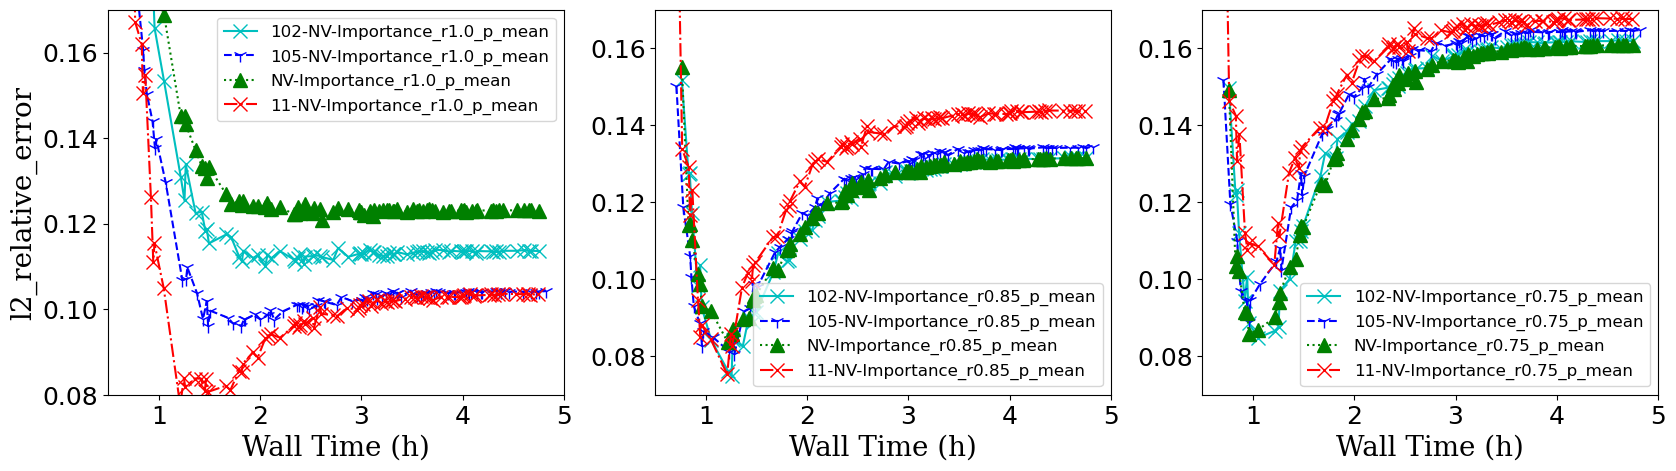

In [21]:
#plot time series p
plotVar = 'p'
plotVars_p_allValidators = [[(f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0][f'{subfolders[0]}_r1.0_{plotVar}_step'] >= 150000
ylims = [(.11,.17),(.07,.14),(.08,.17)]
manualLegend = ['Baseline_8M','SGM-SPADE_8M_r1.0_p','MIS_8M_r1.0_p','Baseline_16M_r1.0_p']
for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
    #fig.suptitle(f'{str.upper(plotVar)} time series for {agNames[i]}')
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    ylims = [(.08,.17),(.07,.17),(.07,.17)]
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        if ylims[k] != ():
            axes[k].set_ylim(*ylims[k])
        axes[k].set_xlim((.5,5))
        #axes[k].set_ylim(*ylims[k])
        for l in j:
            rawdat = dataframes[i][list(l)]
            rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
            rawdat[rawdat[l[0]] >= .7].plot(x=l[0],y=l[1],ax=axes[k],markersize=10)
            axes[k].set_xlabel('Wall Time (h)', fontdict=font2)
            axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
            axes[k].tick_params(axis='both', labelsize=18)
            print(l)
            time = [(q) for q in dataframes[i][l[0]]]
            print(f'{(time[-1]-time[1])/60/60}')
        #axes[k].legend(manualLegend)
# import matplotlib.pyplot as plt
# rawdat = dataframes[0][['SGM_SPADE_validator_2_p_step','SGM_SPADE_wall_time','test_wall_time',
#                         'SGM_SPADE_validator_2_p_mean','test_validator_2_p_mean']
#               ][dataframes[0]['SGM_SPADE_validator_2_p_step'] >= 150000]
# rawdat.loc[:,'SGM_SPADE_wall_time'] = (rawdat.loc[:,'SGM_SPADE_wall_time'] - rawdat.loc[0,'SGM_SPADE_wall_time'])/60/60
# rawdat.loc[:,'test_wall_time'] = (rawdat.loc[:,'test_wall_time'] - rawdat.loc[0,'test_wall_time'])/60/60
# #.plot(x='SGM_SPADE_validator_2_p_step', y = 'SGM_SPADE_validator_2_p_mean')

# #[dataframes[0]['SGM_SPADE_validator_3_p_step'] >= 150000]

# ax = rawdat.plot(x='SGM_SPADE_wall_time', y = 'SGM_SPADE_validator_2_p_mean')
# rawdat.plot(x='test_wall_time', y = 'test_validator_2_p_mean', ax=ax)
# plt.show()

[[('102-NV-Importance_wall_time', '102-NV-Importance_r1.0_u_mean'), ('105-NV-Importance_wall_time', '105-NV-Importance_r1.0_u_mean'), ('NV-Importance_wall_time', 'NV-Importance_r1.0_u_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r1.0_u_mean')], [('102-NV-Importance_wall_time', '102-NV-Importance_r0.85_u_mean'), ('105-NV-Importance_wall_time', '105-NV-Importance_r0.85_u_mean'), ('NV-Importance_wall_time', 'NV-Importance_r0.85_u_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r0.85_u_mean')], [('102-NV-Importance_wall_time', '102-NV-Importance_r0.75_u_mean'), ('105-NV-Importance_wall_time', '105-NV-Importance_r0.75_u_mean'), ('NV-Importance_wall_time', 'NV-Importance_r0.75_u_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r0.75_u_mean')]]


C:\Users\John Anticev\AppData\Local\Temp\ipykernel_20632\4285667459.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
C:\Users\John Anticev\AppData\Local\Temp\ipykernel_20632\4285667459.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
C:\Users\John Anticev\AppData\Local\Temp\ipykernel_20632\4285667459.py:20: SettingWithCopyWarning: 
A value is trying to be set on a

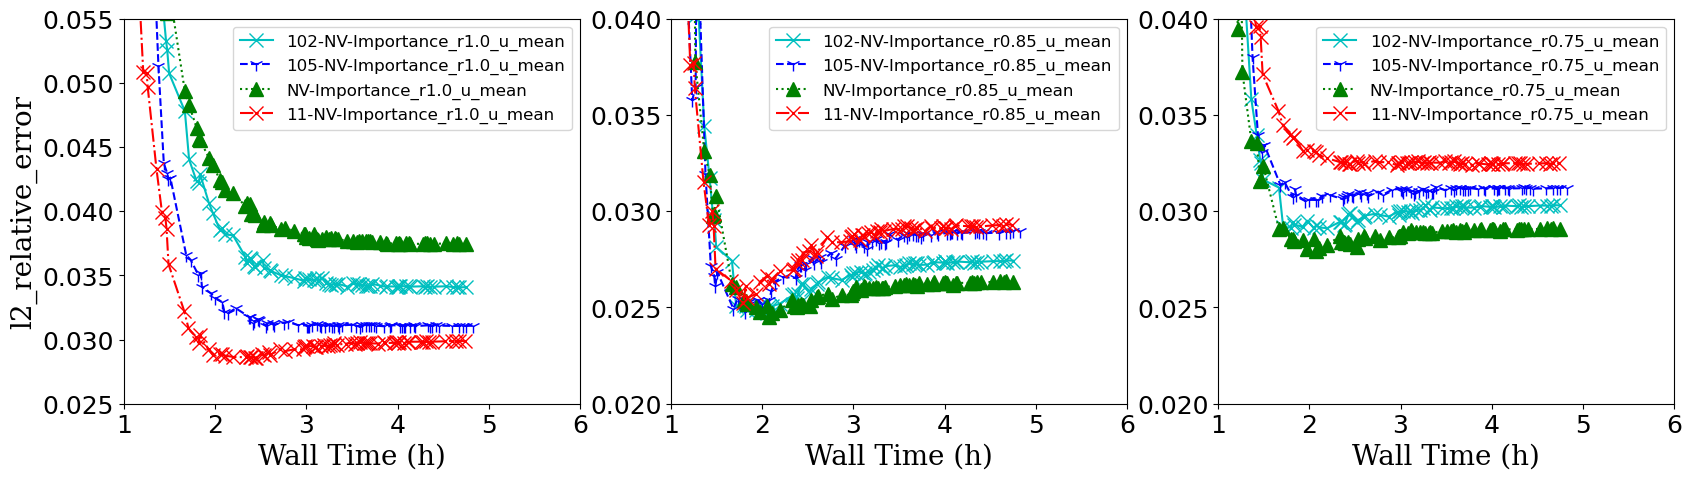

In [22]:
#plot time series u
plotVar = 'u'
plotVars_p_allValidators = [[(f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0][f'{subfolders[0]}_r1.0_{plotVar}_step'] >= 150000
#set plotVar to uppercase
for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
    #fig.suptitle(f'{str.upper(plotVar)} time series for {agNames[i]}')
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    ylims = [(.025,.055),(.02,.04),(.02,.04)]
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        if ylims[k] != ():
            axes[k].set_ylim(*ylims[k])
        axes[k].set_xlim((1,6))
        #axes[k].set_ylim(*ylims[k])
        for l in j:
            rawdat = dataframes[i][list(l)]
            rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
            rawdat[rawdat[l[0]] >= .7].plot(x=l[0],y=l[1],ax=axes[k],markersize=10)
            axes[k].set_xlabel('Wall Time (h)', fontdict=font2)
            axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
            axes[k].tick_params(axis='both', labelsize=18)
        #axes[k].legend(manualLegend)

# import matplotlib.pyplot as plt
# rawdat = dataframes[0][['SGM_SPADE_validator_2_p_step','SGM_SPADE_wall_time','test_wall_time',
#                         'SGM_SPADE_validator_2_p_mean','test_validator_2_p_mean']
#               ][dataframes[0]['SGM_SPADE_validator_2_p_step'] >= 150000]
# rawdat.loc[:,'SGM_SPADE_wall_time'] = (rawdat.loc[:,'SGM_SPADE_wall_time'] - rawdat.loc[0,'SGM_SPADE_wall_time'])/60/60
# rawdat.loc[:,'test_wall_time'] = (rawdat.loc[:,'test_wall_time'] - rawdat.loc[0,'test_wall_time'])/60/60
# #.plot(x='SGM_SPADE_validator_2_p_step', y = 'SGM_SPADE_validator_2_p_mean')

# #[dataframes[0]['SGM_SPADE_validator_3_p_step'] >= 150000]

# ax = rawdat.plot(x='SGM_SPADE_wall_time', y = 'SGM_SPADE_validator_2_p_mean')
# rawdat.plot(x='test_wall_time', y = 'test_validator_2_p_mean', ax=ax)
# plt.show()

[[('102-NV-Importance_wall_time', '102-NV-Importance_r1.0_v_mean'), ('105-NV-Importance_wall_time', '105-NV-Importance_r1.0_v_mean'), ('NV-Importance_wall_time', 'NV-Importance_r1.0_v_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r1.0_v_mean')], [('102-NV-Importance_wall_time', '102-NV-Importance_r0.85_v_mean'), ('105-NV-Importance_wall_time', '105-NV-Importance_r0.85_v_mean'), ('NV-Importance_wall_time', 'NV-Importance_r0.85_v_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r0.85_v_mean')], [('102-NV-Importance_wall_time', '102-NV-Importance_r0.75_v_mean'), ('105-NV-Importance_wall_time', '105-NV-Importance_r0.75_v_mean'), ('NV-Importance_wall_time', 'NV-Importance_r0.75_v_mean'), ('11-NV-Importance_wall_time', '11-NV-Importance_r0.75_v_mean')]]


C:\Users\John Anticev\AppData\Local\Temp\ipykernel_20632\321411275.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
C:\Users\John Anticev\AppData\Local\Temp\ipykernel_20632\321411275.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
C:\Users\John Anticev\AppData\Local\Temp\ipykernel_20632\321411275.py:21: SettingWithCopyWarning: 
A value is trying to be set on a co

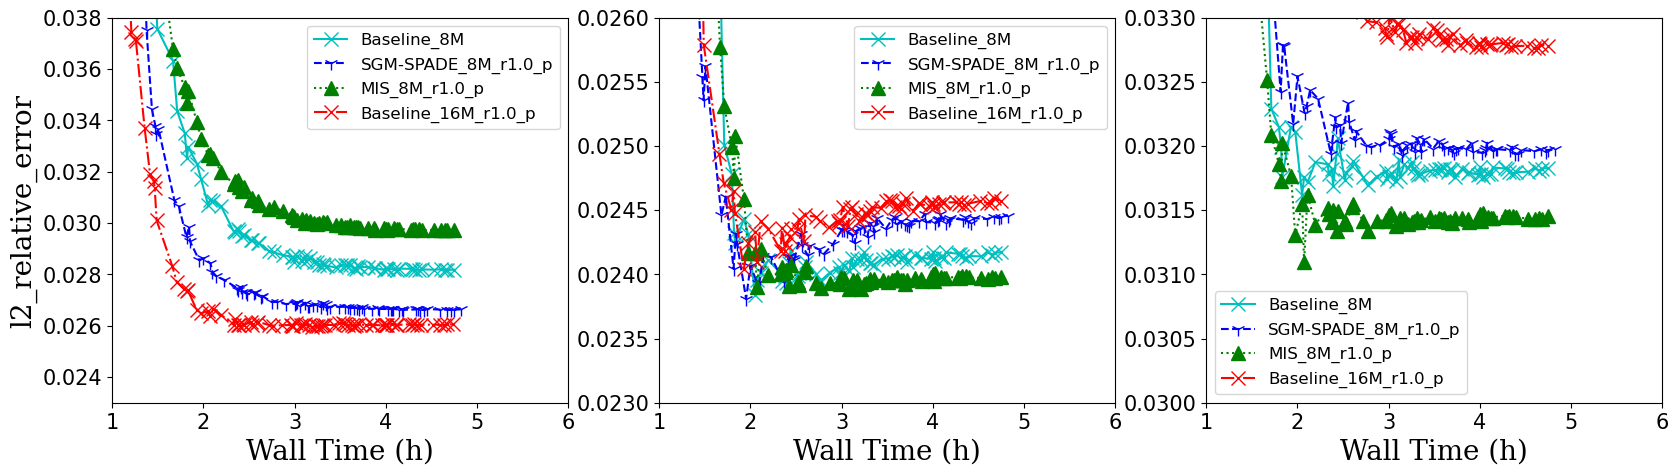

In [23]:
#plot time series v
plotVar = 'v'
plotVars_p_allValidators = [[(f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0][f'{subfolders[0]}_r1.0_{plotVar}_step'] >= 150000
#set plotVar to uppercase
#ylims = [(.022,.05),(.022,.05),(.022,.05)]
for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
    #fig.suptitle(f'{str.upper(plotVar)} time series for {agNames[i]}')
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    ylims = [(.023,.038),(.023,.026),(.030,.033)]
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        if ylims[k] != ():
            axes[k].set_ylim(*ylims[k])
        axes[k].set_xlim((1,6))
        #axes[k].set_ylim(*ylims[k])
        for l in j:
            rawdat = dataframes[i][list(l)]
            rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
            rawdat[rawdat[l[0]] >= .7].plot(x=l[0],y=l[1],ax=axes[k],markersize=10)
            axes[k].set_xlabel('Wall Time (h)', fontdict=font2)
            axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
            axes[k].tick_params(axis='both', labelsize=15)
        axes[k].legend(manualLegend)
# import matplotlib.pyplot as plt
# rawdat = dataframes[0][['SGM_SPADE_validator_2_p_step','SGM_SPADE_wall_time','test_wall_time',
#                         'SGM_SPADE_validator_2_p_mean','test_validator_2_p_mean']
#               ][dataframes[0]['SGM_SPADE_validator_2_p_step'] >= 150000]
# rawdat.loc[:,'SGM_SPADE_wall_time'] = (rawdat.loc[:,'SGM_SPADE_wall_time'] - rawdat.loc[0,'SGM_SPADE_wall_time'])/60/60
# rawdat.loc[:,'test_wall_time'] = (rawdat.loc[:,'test_wall_time'] - rawdat.loc[0,'test_wall_time'])/60/60
# #.plot(x='SGM_SPADE_validator_2_p_step', y = 'SGM_SPADE_validator_2_p_mean')

# #[dataframes[0]['SGM_SPADE_validator_3_p_step'] >= 150000]

# ax = rawdat.plot(x='SGM_SPADE_wall_time', y = 'SGM_SPADE_validator_2_p_mean')
# rawdat.plot(x='test_wall_time', y = 'test_validator_2_p_mean', ax=ax)
# plt.show()